## Algorithmically Identifying Stock Price Support & Resistance

### 7 Essential Methods to Discover Key Price Levels in Stock Prices
1. Rolling Midpoint Range
2. Fibonacci Retracement
3. Swing Highs and Lows
4. Pivot Point Analysis
5. K-Means Price Clustering
6. Volume Profiler
7. Regression Modelling

### 1 Rolling Midpoint Range
The Rolling Midpoint Range method employs moving averages and price range evaluations over a designated interval to highlight potential support and resistance areas. This approach fundamentally revolves around the rolling window concept:

- Determine High and Low: For each stock price point, a certain number of previous data points are considered. Within this window (e.g., 30 days), the highest and lowest prices are identified.
- Establish the Midpoint: This midpoint is calculated by taking the average of the identified high and low values.
- Set Support and Resistance Levels: Support is deduced from the midpoint by subtracting half of the price range (difference between the determined high and low). Conversely, resistance is inferred by adding half of this range to the midpoint.

[*********************100%%**********************]  1 of 1 completed


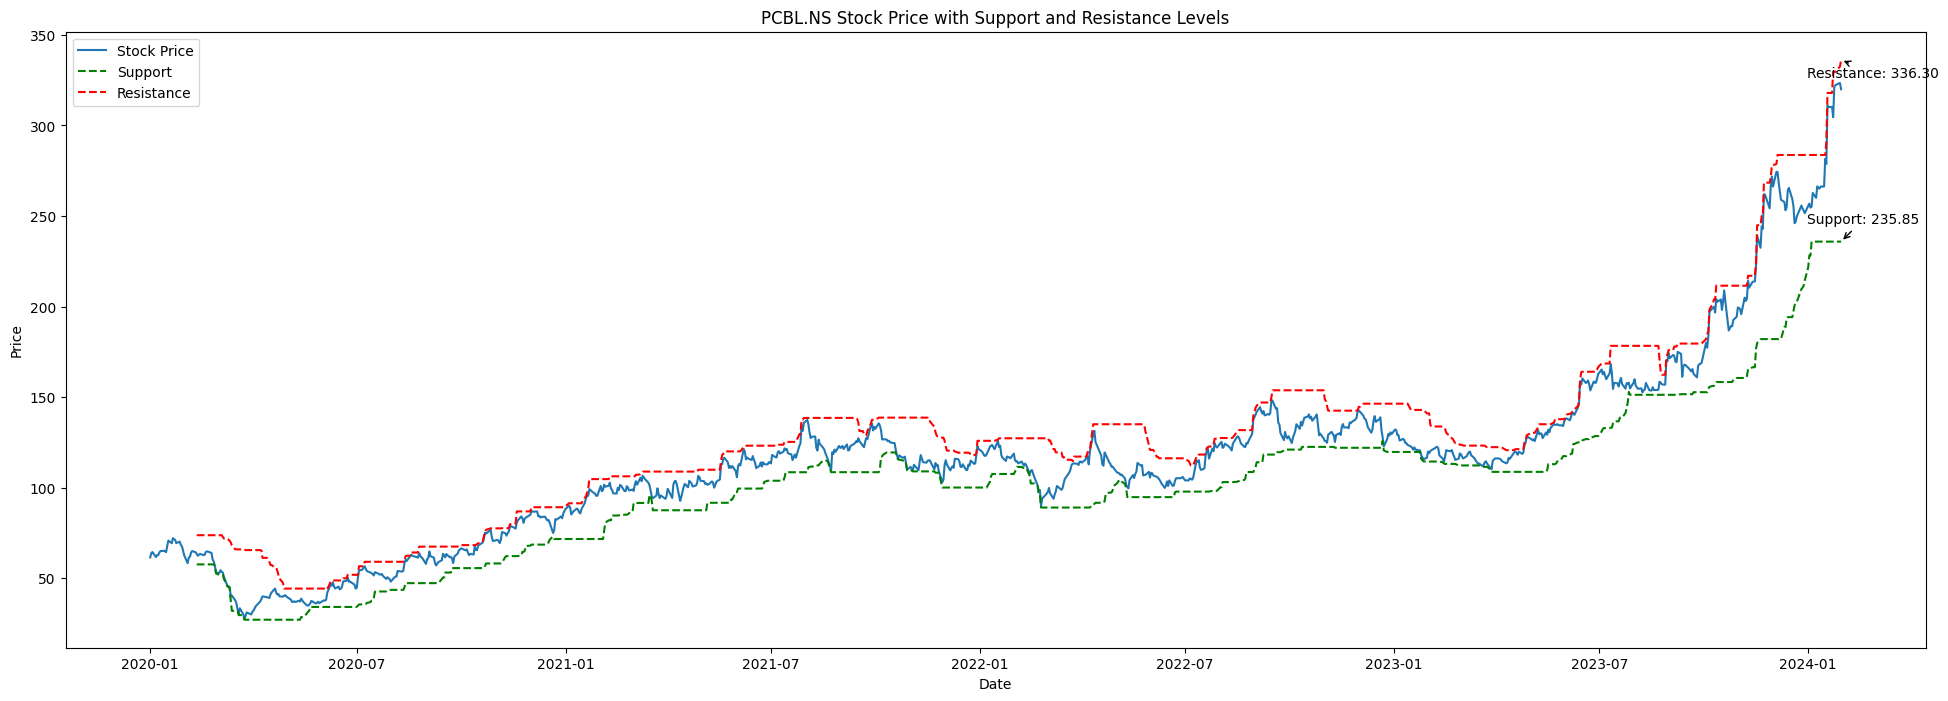

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def find_levels(data, window):
    high = data['High'].rolling(window=window).max()
    low = data['Low'].rolling(window=window).min()
    midpoint = (high + low) / 2
    diff = high - low
    resistance = midpoint + (diff / 2)
    support = midpoint - (diff / 2)
    return support, resistance

# Download historical stock prices
symbol = "PCBL.NS"
start_date = '2020-01-01'
end_date = '2024-01-31'
data = yf.download(symbol, start=start_date, end=end_date)

window = 30

# Calculate support and resistance levels
support, resistance = find_levels(data, window)

# Plot the stock price, support, and resistance lines
fig, ax = plt.subplots(figsize=(24, 8))
ax.plot(data.index, data['Close'], label='Stock Price')
ax.plot(data.index, support, label='Support', linestyle='--', color='green')
ax.plot(data.index, resistance, label='Resistance', linestyle='--', color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title(f'{symbol} Stock Price with Support and Resistance Levels')
ax.legend()

# Add annotations for last support and resistance levels
last_support = support.iloc[-1]
last_resistance = resistance.iloc[-1]
ax.annotate(f'Support: {last_support:.2f}', xy=(support.index[-1], last_support),
            xytext=(support.index[-1] - pd.DateOffset(days=30), last_support + 10),
            arrowprops=dict(facecolor='green', arrowstyle='->'))
ax.annotate(f'Resistance: {last_resistance:.2f}', xy=(resistance.index[-1], last_resistance),
            xytext=(resistance.index[-1] - pd.DateOffset(days=30), last_resistance - 10),
            arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.show()

### 2. Fibonacci Retracement
Fibonacci Retracement, grounded in the Fibonacci sequence established by Leonardo Fibonacci in the 13th century, is a pivotal technical analysis tool. It pinpoints potential support and resistance zones, assisting traders in identifying prospective market reversal points. Here’s a concise breakdown:

- **Understanding the Tool:** Fibonacci retracement levels are horizontal markers on a chart, indicating where price reversals might occur. These levels — 23.6%, 38.2%, 50%, 61.8%, and 78.6% — signify how much of a prior price movement has been retraced. For instance, if a stock ascends from $10 to $20 and then drops to $15, it has retraced 50% of its rise.
- **Application in Trading:** These percentages are used to create horizontal lines on price charts, suggesting areas where prices might pivot. Such levels, particularly the 61.8% (Golden Ratio), are rooted in the Fibonacci sequence and have shown consistent relevance in influencing stock price behavior.

[*********************100%%**********************]  1 of 1 completed


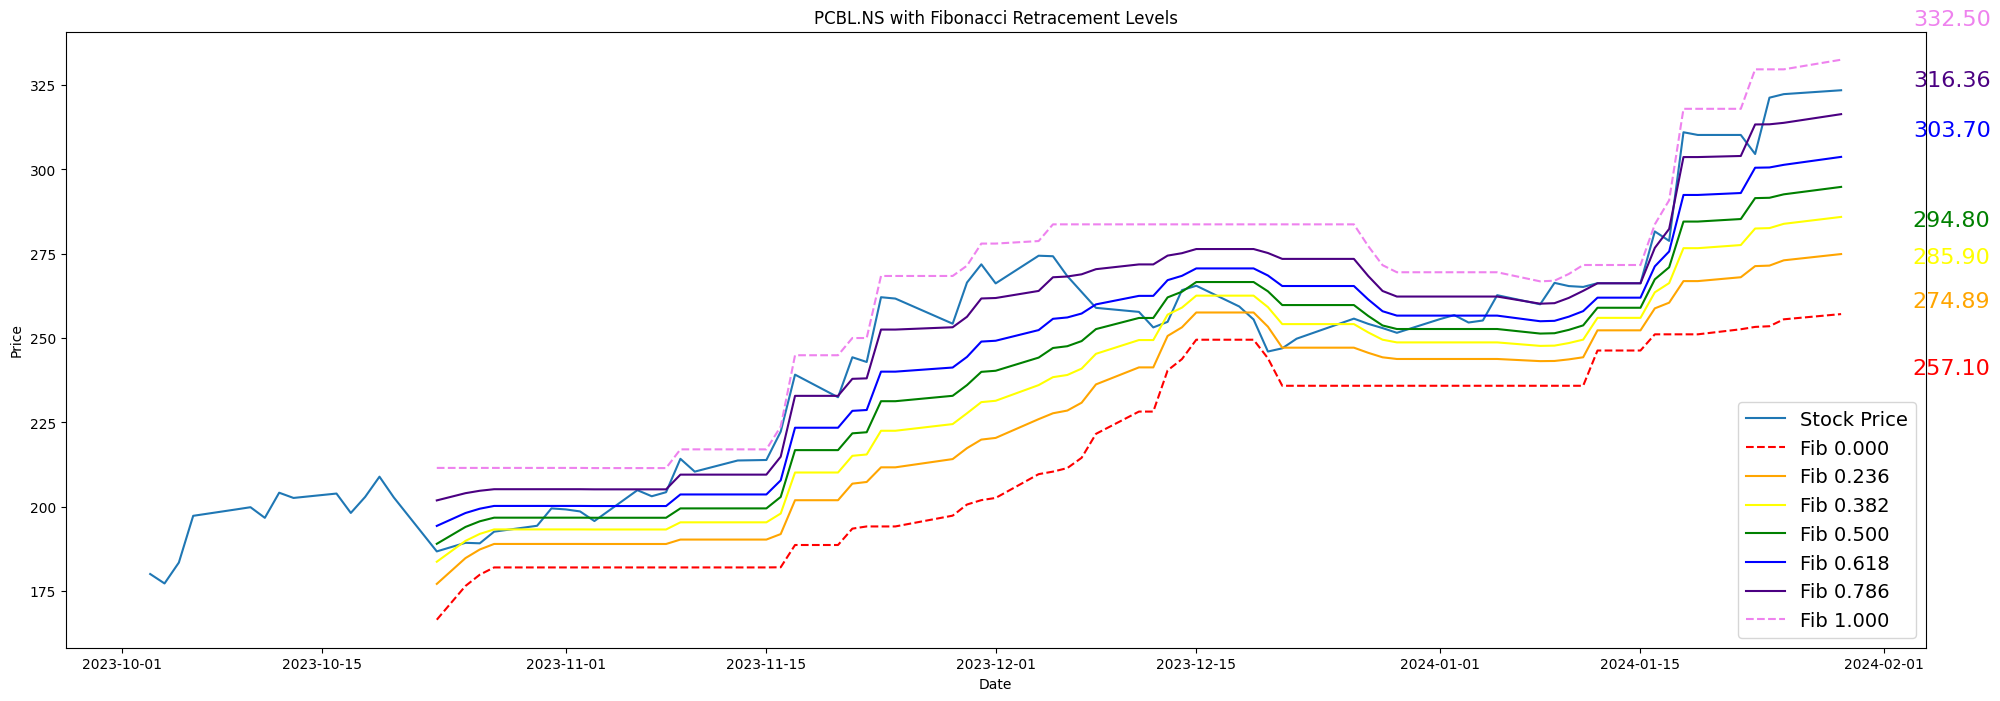

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the stock data for ASML.AS
symbol = "PCBL.NS"
stock_data = yf.download(symbol, start="2023-10-01", end="2024-01-30")

# Define the lookback period for calculating high and low prices
lookback_period = 15

# Calculate the high and low prices over the lookback period
high_prices = stock_data["High"].rolling(window=lookback_period).max()
low_prices = stock_data["Low"].rolling(window=lookback_period).min()

# Calculate the price difference and Fibonacci levels
price_diff = high_prices - low_prices
levels = np.array([0, 0.236, 0.382, 0.5, 0.618, 0.786, 1])
fib_levels = low_prices.values.reshape(-1, 1) + price_diff.values.reshape(-1, 1) * levels

# Get the last price for each Fibonacci level
last_prices = fib_levels[-1, :]

# Define a color palette for the Fibonacci levels
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# Plot the stock price with the Fibonacci retracement levels and last prices
fig, ax = plt.subplots(figsize=(24,8))
ax.plot(stock_data.index, stock_data["Close"], label="Stock Price")

offsets = [-16, -14, -12, -10, 8, 10, 12]

for i, level in enumerate(levels):
    if level == 0 or level == 1:
        linestyle = "--"
    else:
        linestyle = "-"
    ax.plot(stock_data.index, fib_levels[:, i], label=f"Fib {level:.3f}", linestyle=linestyle, color=colors[i])
    ax.annotate(f"{last_prices[i]:.2f}",
                xy=(stock_data.index[-1], fib_levels[-1, i]),
                xytext=(stock_data.index[-1] + pd.Timedelta(days=5), fib_levels[-1, i] + offsets[i]),
                ha="left", va="center", fontsize=16, color=colors[i])

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title(f"{symbol} with Fibonacci Retracement Levels")
ax.legend(loc="lower right", fontsize=14)

plt.show()

### 3. Swing Highs and Lows
Swing trading focuses on capitalizing on short-term price fluctuations by pinpointing key inflection points on a stock’s chart, known as “swing highs” and “swing lows.” These represent local maxima and minima where a stock’s price has reached a temporary peak or valley and might be poised to reverse its direction.

**The methodology involves:**

- Identifying Swing Highs: This entails finding points on the stock chart where the price is higher than those immediately surrounding it, suggesting areas of potential resistance.
- Spotting Swing Lows: Conversely, these are points where the stock price is lower than those immediately adjacent, indicating potential support levels.


[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_28900/3623830156.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_data['Swing_High'] = stock_data['High'][argrelextrema(stock_data['High'].values, np.greater_equal, order=5)[0]]
/tmp/ipykernel_28900/3623830156.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_data['Swing_Low'] = stock_data['Low'][argrelextrema(stock_data['Low'].values, np.less_equal, order=5)[0]]


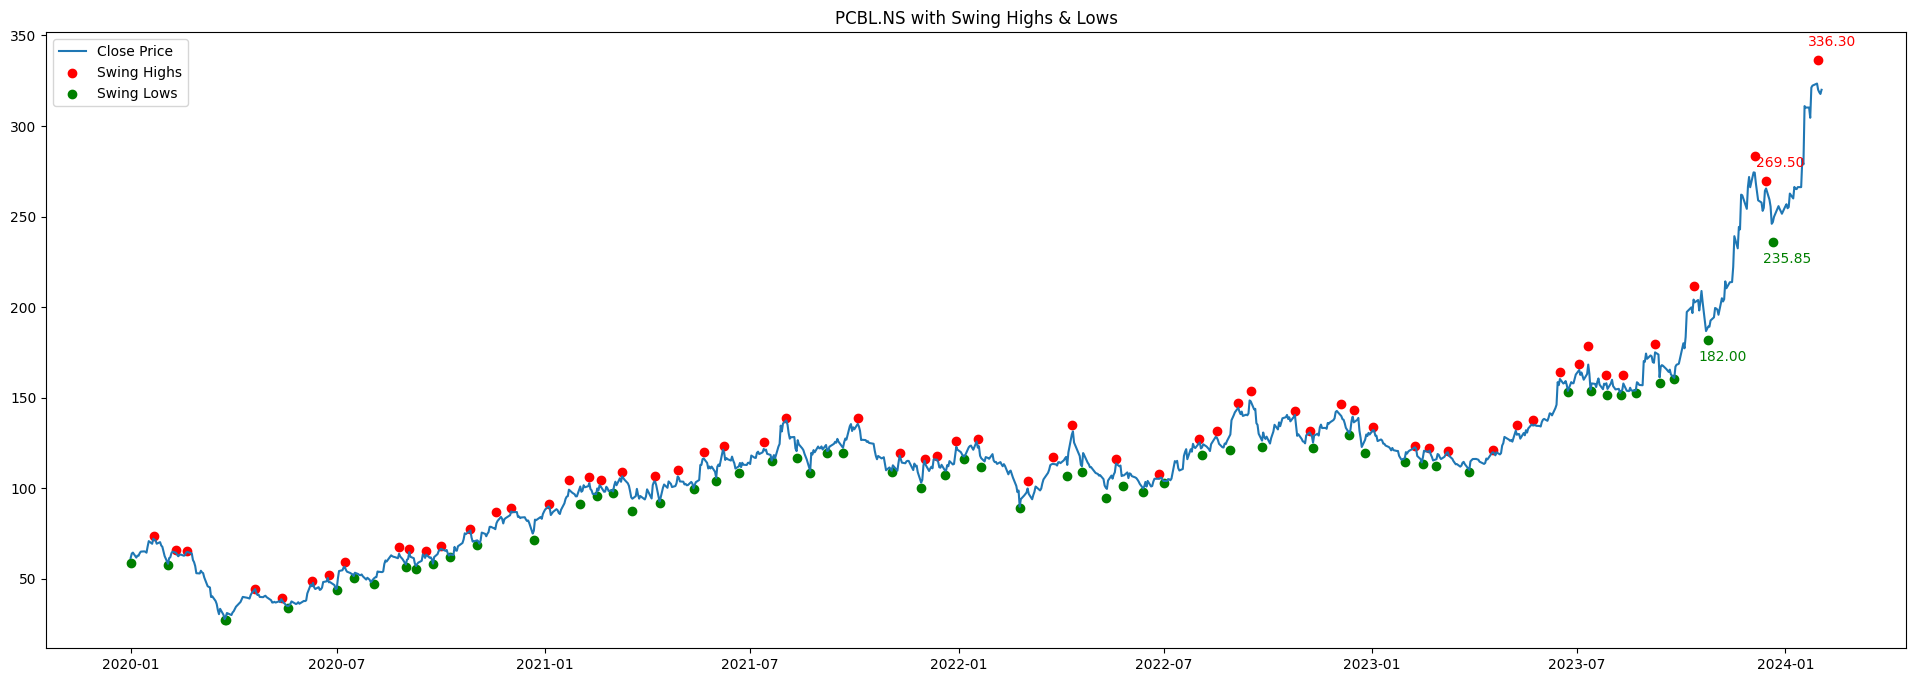

In [7]:
import yfinance as yf
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Download stock data
symbol = "PCBL.NS"
stock_data = yf.download(symbol, start="2020-01-01", end="2024-12-30")

# Identify local maxima (swing highs)
stock_data['Swing_High'] = stock_data['High'][argrelextrema(stock_data['High'].values, np.greater_equal, order=5)[0]]

# Identify local minima (swing lows)
stock_data['Swing_Low'] = stock_data['Low'][argrelextrema(stock_data['Low'].values, np.less_equal, order=5)[0]]

# Find last two non-NaN values for Swing Highs and Swing Lows
last_two_resistances = stock_data['Swing_High'].dropna().tail(2)
last_two_supports = stock_data['Swing_Low'].dropna().tail(2)

# Plotting
plt.figure(figsize=(24,8))
plt.plot(stock_data['Close'], label="Close Price")
plt.scatter(stock_data.index, stock_data['Swing_High'], color='r', label='Swing Highs', marker='o')
plt.scatter(stock_data.index, stock_data['Swing_Low'], color='g', label='Swing Lows', marker='o')

# Annotate the last two resistance and support prices
for date, price in last_two_resistances.items():
    plt.annotate(f"{price:.2f}", (date, price), textcoords="offset points", xytext=(10,10), ha='center', color='r')

for date, price in last_two_supports.items():
    plt.annotate(f"{price:.2f}", (date, price), textcoords="offset points", xytext=(10,-15), ha='center', color='g')

plt.title(f'{symbol} with Swing Highs & Lows')
plt.legend()
plt.show()

### 4. Pivot Point Analysis
Pivot points are short-term trend indicators used by traders to determine potential support and resistance levels. They are especially popular in day trading. The central pivot point, as well as derived support and resistance levels, are calculated using the high, low, and close prices of a previous period (usually the previous day for day trading).

**Methodology:**

1. Pivot Point (P): It’s the average of the high, low, and close of the previous trading period. Pivot=(High+Low+Close)/3​
2. First Resistance (R1): It’s calculated by doubling the pivot point and then subtracting the previous low. R1=2×Pivot−Low
3. First Support (S1): Derived by doubling the pivot point and then subtracting the previous high. S1=2×Pivot−High
4. Second Resistance (R2): Obtained by adding the difference of high and low (the range) to the pivot point. R2=Pivot+(High−Low)
5. Second Support (S2): Found by subtracting the range from the pivot point. S2=Pivot−(High−Low)

[*********************100%%**********************]  1 of 1 completed


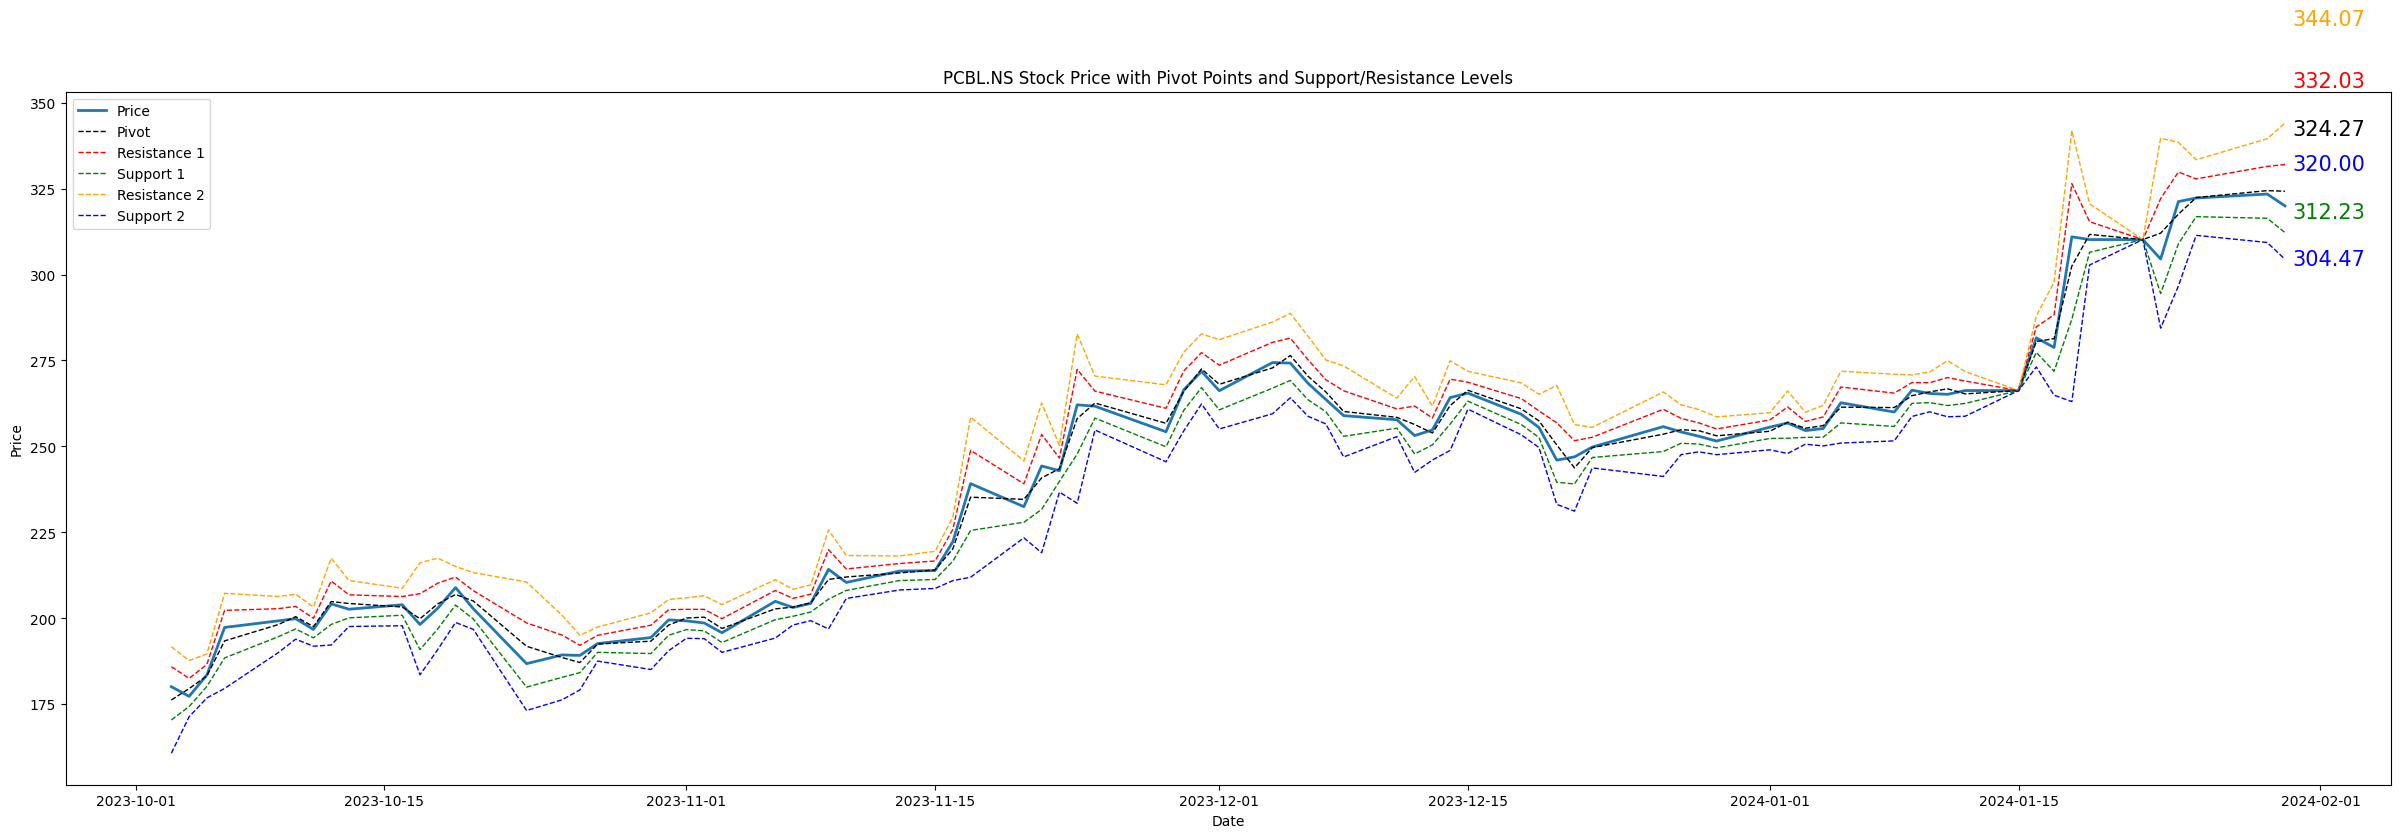

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def calculate_pivot_points(df):
    df['Pivot'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['R1'] = 2 * df['Pivot'] - df['Low']
    df['S1'] = 2 * df['Pivot'] - df['High']
    df['R2'] = df['Pivot'] + (df['High'] - df['Low'])
    df['S2'] = df['Pivot'] - (df['High'] - df['Low'])
    return df

ticker = 'PCBL.NS'
start_date = '2023-10-01'
end_date = '2024-01-31'

data = yf.download(ticker, start=start_date, end=end_date)
df = calculate_pivot_points(data)
df = df.dropna()

fig, ax = plt.subplots(figsize=(30, 9))

ax.plot(df.index, df['Close'], label='Price', linewidth=2)
ax.plot(df.index, df['Pivot'], label='Pivot', linestyle='--', linewidth=1, color='black')
ax.plot(df.index, df['R1'], label='Resistance 1', linestyle='--', linewidth=1, color='red')
ax.plot(df.index, df['S1'], label='Support 1', linestyle='--', linewidth=1, color='green')
ax.plot(df.index, df['R2'], label='Resistance 2', linestyle='--', linewidth=1, color='orange')
ax.plot(df.index, df['S2'], label='Support 2', linestyle='--', linewidth=1, color='blue')

ax.set_title(f'{ticker} Stock Price with Pivot Points and Support/Resistance Levels')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

# Annotate prices for the last observation
last_date = df.index[-1]
points = {
    'Price': df['Close'].iloc[-1],
    'Pivot': df['Pivot'].iloc[-1],
    'R1': df['R1'].iloc[-1],
    'S1': df['S1'].iloc[-1],
    'R2': df['R2'].iloc[-1],
    'S2': df['S2'].iloc[-1],
}

colors = {
    'Price': 'blue',
    'Pivot': 'black',
    'R1': 'red',
    'S1': 'green',
    'R2': 'orange',
    'S2': 'blue'
}

sorted_points = sorted(points.items(), key=lambda x: x[1])

for i, (label, value) in enumerate(sorted_points):
    ax.annotate(f"{value:.2f}", xy=(last_date, value), xytext=(5, i * 15),
                textcoords="offset points", fontsize=15, ha='left', va='center', color=colors[label])

plt.show()

### 5 K-Means Price Clustering
KMeans clustering is fundamentally about grouping data points that are statistically close to each other. When applied to stock prices, it groups together price levels that have been frequently visited over a specific time frame. The central positions of these clusters, called centroids, then signify key price levels where significant trading activity has occurred.

**KMeans Helps in Identifying Support and Resistance in the Following Way:**

1. Clustering: By running the KMeans algorithm on the normalized price data (so that values range be values ranging between 0 and 1), it identifies clusters based on proximity. The centroids (or the center) of these clusters, especially in the price dimension, indicate significant levels around which price movements cluster.
2. Interpreting Results: The y-coordinates of the centroids (representing price) can be treated as potential support or resistance levels. These are levels around which stock prices have historically shown significant activity.

[*********************100%%**********************]  1 of 1 completed


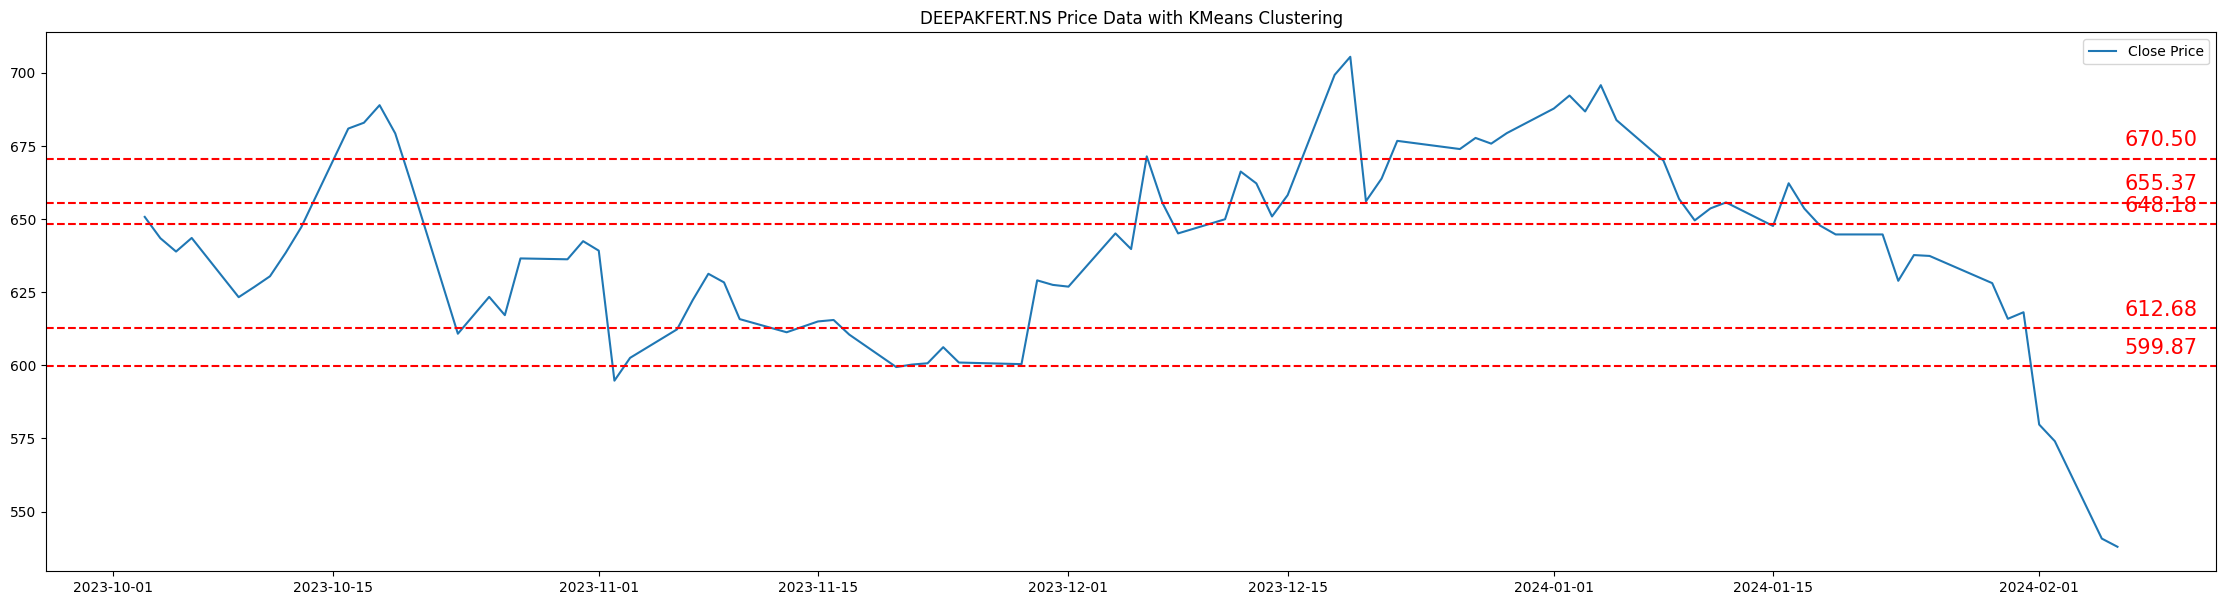

In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Download stock data
symbol = "DEEPAKFERT.NS"
stock_data = yf.download(symbol, start="2023-10-01", end="2024-02-07")

# Preparing data for clustering: Normalize time and price to have similar scales
X_time = np.linspace(0, 1, len(stock_data)).reshape(-1, 1)
X_price = (stock_data['Close'].values - np.min(stock_data['Close'])) / (np.max(stock_data['Close']) - np.min(stock_data['Close']))
X_cluster = np.column_stack((X_time, X_price))

# Applying KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X_cluster)

# Extract cluster centers and rescale back to original price range
cluster_centers = kmeans.cluster_centers_[:, 1] * (np.max(stock_data['Close']) - np.min(stock_data['Close'])) + np.min(stock_data['Close'])

# Plotting
plt.figure(figsize=(28,7))
plt.plot(stock_data['Close'], label="Close Price")
for center in cluster_centers:
    plt.axhline(y=center, color='r', linestyle='--')
    plt.annotate(f"{center:.2f}", xy=(stock_data.index[-1], center * 1.01), xytext=(5,0), textcoords="offset points", fontsize=15, ha='left', va='center', color='r')

plt.title(f'{symbol} Price Data with KMeans Clustering')
plt.legend()
plt.show()

### 6. Volume Profiler

When determining potential key support and resistance levels, it is reasonable to consider the volume of trades occurring at different price levels. The volume profile provides a visual representation of trading activity (volume) at different price levels over a specified time frame. Unlike the volume histogram that plots volume against time, the volume profile plots volume against price, allowing us to identify price levels where a large amount of trading activity has occurred. These high-volume areas often act as significant support or resistance levels because they represent price points where a considerable amount of buying or selling has taken place in the past.



[*********************100%%**********************]  1 of 1 completed


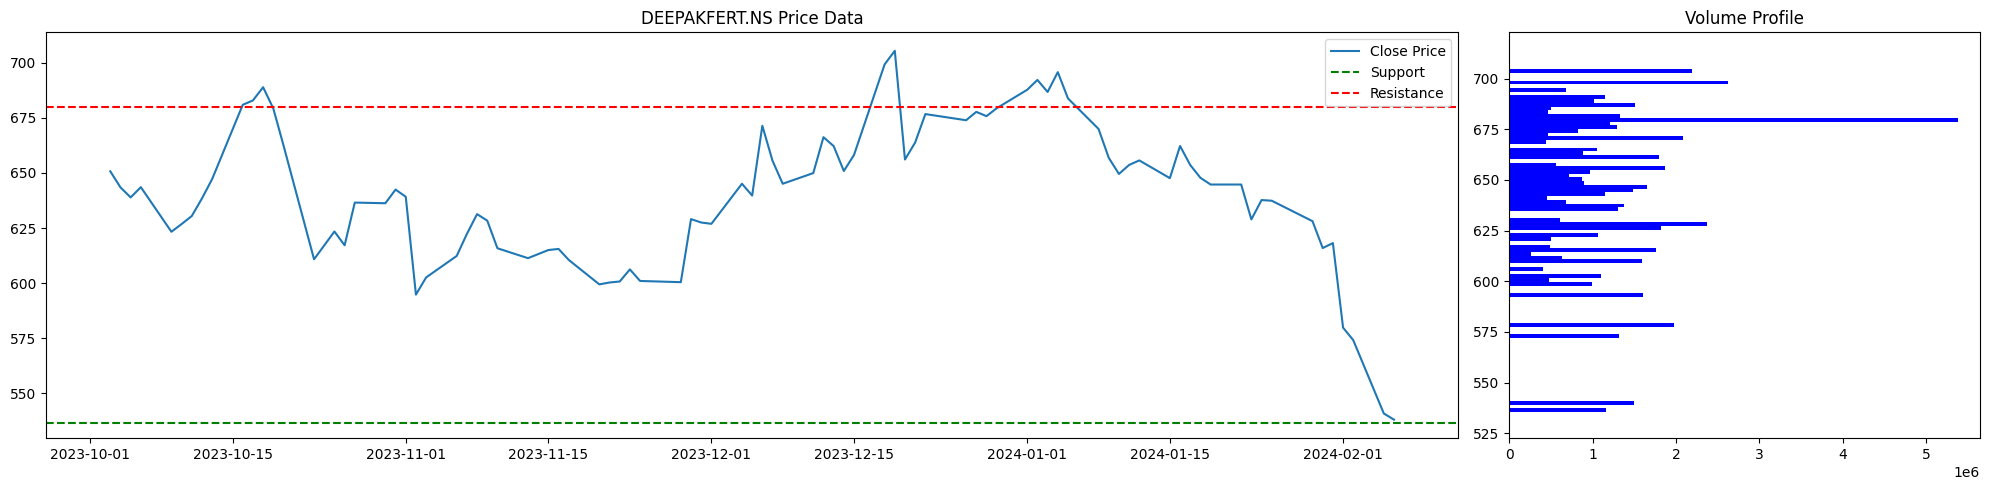

Estimated Support Price: 536.28
Estimated Resistance Price: 679.75


In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download stock data
symbol = "DEEPAKFERT.NS"
stock_data = yf.download(symbol, start="2023-10-01", end="2024-02-07")

# Calculate volume profile
price_bins = np.linspace(stock_data['Low'].min(), stock_data['High'].max(), 100)
volume_profile = []

for i in range(len(price_bins)-1):
    bin_mask = (stock_data['Close'] > price_bins[i]) & (stock_data['Close'] <= price_bins[i+1])
    volume_profile.append(stock_data['Volume'][bin_mask].sum())

# Estimating support and resistance
curr2.Volume Ratio Over Time: The green line shows the volume ratio over time. The red dashed line is our set limit. When the green line goes above it, that’s when trading kicked up a notch
ent_price = stock_data['Close'].iloc[-1]
support_idx = np.argmax(volume_profile[:np.digitize(current_price, price_bins)])
resistance_idx = np.argmax(volume_profile[np.digitize(current_price, price_bins):]) + np.digitize(current_price, price_bins)

support_price = price_bins[support_idx]
resistance_price = price_bins[resistance_idx]

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), gridspec_kw={'width_ratios': [3, 1]})
ax1.plot(stock_data['Close'], label="Close Price")
ax1.axhline(y=support_price, color='g', linestyle='--', label='Support')
ax1.axhline(y=resistance_price, color='r', linestyle='--', label='Resistance')
ax1.legend()
ax1.set_title(f'{symbol} Price Data')
ax2.barh(price_bins[:-1], volume_profile, height=(price_bins[1] - price_bins[0]), color='blue', edgecolor='none')
ax2.set_title('Volume Profile')

plt.tight_layout()
plt.show()

print(f"Estimated Support Price: {support_price:.2f}")
print(f"Estimated Resistance Price: {resistance_price:.2f}")

### 7 Linear and Polinomial Regression
Linear regression, applied in the realm of financial markets, offers a simplistic yet effective method to delineate dynamic support and resistance levels. By identifying swing highs and lows — key price points where the market has historically turned — it provides traders with a visual representation of a stock's potential path, showcasing zones where a stock might find price support or resistance in the future.

Polynomial regression takes a different approach. Rather than straight lines, it draws curve-fitted lines to encapsulate the often non-linear nature of stock price changes. By integrating both these methodologies, traders gain a holistic viewpoint, enabling them to pinpoint possible shifts in market sentiment and zones of buying or selling pressure.



[*********************100%%**********************]  1 of 1 completed


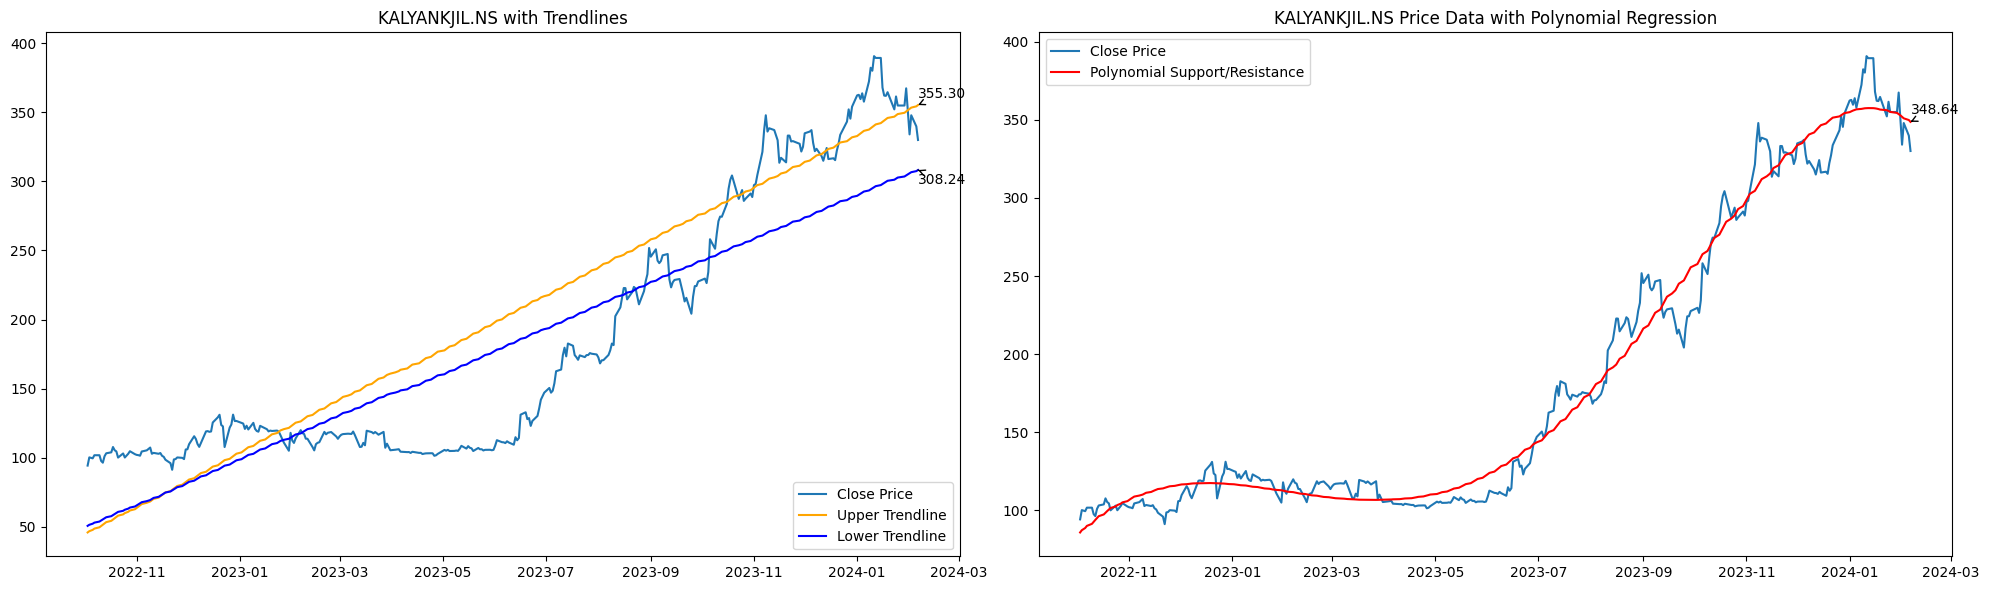

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Specify the ticker
symbol = "KALYANKJIL.NS"

# Download stock data
stock_data = yf.download(symbol, start="2022-10-01", end="2024-02-07")

# Identify local maxima (swing highs) and minima (swing lows)
swing_highs = argrelextrema(stock_data['High'].values, np.greater_equal, order=5)[0]
swing_lows = argrelextrema(stock_data['Low'].values, np.less_equal, order=5)[0]

# Linear regression for trendlines
upper_m, upper_b = np.polyfit(swing_highs, stock_data['High'].values[swing_highs], 1)
lower_m, lower_b = np.polyfit(swing_lows, stock_data['Low'].values[swing_lows], 1)

stock_data['Upper_Trendline'] = upper_m * np.arange(len(stock_data)) + upper_b
stock_data['Lower_Trendline'] = lower_m * np.arange(len(stock_data)) + lower_b

# Preparing data for polynomial regression
X = np.array(range(len(stock_data))).reshape(-1, 1)
y = stock_data['Close'].values

# Polynomial regression
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)
y_pred = poly_regressor.predict(X_poly)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(stock_data['Close'], label="Close Price")
ax1.plot(stock_data['Upper_Trendline'], label="Upper Trendline", color="orange")
ax1.plot(stock_data['Lower_Trendline'], label="Lower Trendline", color="blue")

# Annotate last prices for Trendlines
ax1.annotate(f"{stock_data['Upper_Trendline'].iloc[-1]:.2f}", 
             xy=(stock_data.index[-1], stock_data['Upper_Trendline'].iloc[-1]), 
             xytext=(stock_data.index[-1], stock_data['Upper_Trendline'].iloc[-1] + 5),
             arrowprops=dict(arrowstyle='->'))

ax1.annotate(f"{stock_data['Lower_Trendline'].iloc[-1]:.2f}", 
             xy=(stock_data.index[-1], stock_data['Lower_Trendline'].iloc[-1]), 
             xytext=(stock_data.index[-1], stock_data['Lower_Trendline'].iloc[-1] - 10),
             arrowprops=dict(arrowstyle='->'))

ax1.set_title(f'{symbol} with Trendlines')
ax1.legend(loc = "lower right")

ax2.plot(stock_data['Close'], label="Close Price")
ax2.plot(stock_data.index, y_pred, color='r', label="Polynomial Support/Resistance")

# Annotate last price for Polynomial Regression
ax2.annotate(f"{y_pred[-1]:.2f}", 
             xy=(stock_data.index[-1], y_pred[-1]), 
             xytext=(stock_data.index[-1], y_pred[-1] + 5),
             arrowprops=dict(arrowstyle='->'))

ax2.set_title(f'{symbol} Price Data with Polynomial Regression')
ax2.legend()

plt.tight_layout()
plt.show()